In [1]:
import astropy.io.fits as fits
from astropy.time import Time
import astropy.constants as const
from astropy import units as u, coordinates as coord
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.interpolate import interp1d

def airtovac(wlnm):
    #Convert wavelengths (nm) in air to wavelengths in vaccuum (empirical).
    wlA = wlnm*10.0
    s = 1e4 / wlA
    n = 1 + (0.00008336624212083 + 0.02408926869968 / (130.1065924522 - s**2) +
    0.0001599740894897 / (38.92568793293 - s**2))
    return wlA * n / 10.0


In [31]:
import pickle
import numpy as np
#data directory + file
dir = './reference_data/observations/WASP-77Ab/'
output_dir = './POSEIDON_output/WASP-77Ab/plots/'
file = dir+'data_RAW.pic'
wl_grid, d = pickle.load(open(file, 'rb'))

In [32]:
Nord, Ntime, Npix = d.shape
print(Nord, Ntime, Npix)

44 79 1848


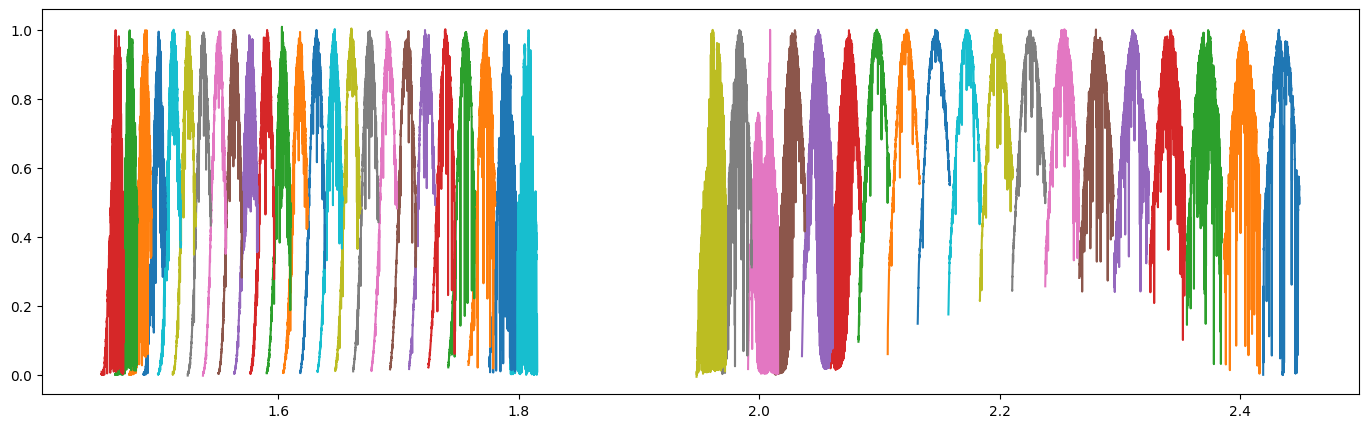

In [33]:
#Plot orders 40-69 in one plot. Notice blaze and overlap.
plt.figure(figsize=(17,5)) 
for i in range(Nord):
    plt.plot(wl_grid[i], d[i][0])
plt.savefig(output_dir+'sepctral_oders.pdf')
plt.show()

In [34]:
list_of_spectra = []
list_of_wl = []

for i in range(Nord):
    list_of_spectra.append(d[i])
    list_of_wl.append(wl_grid[i])

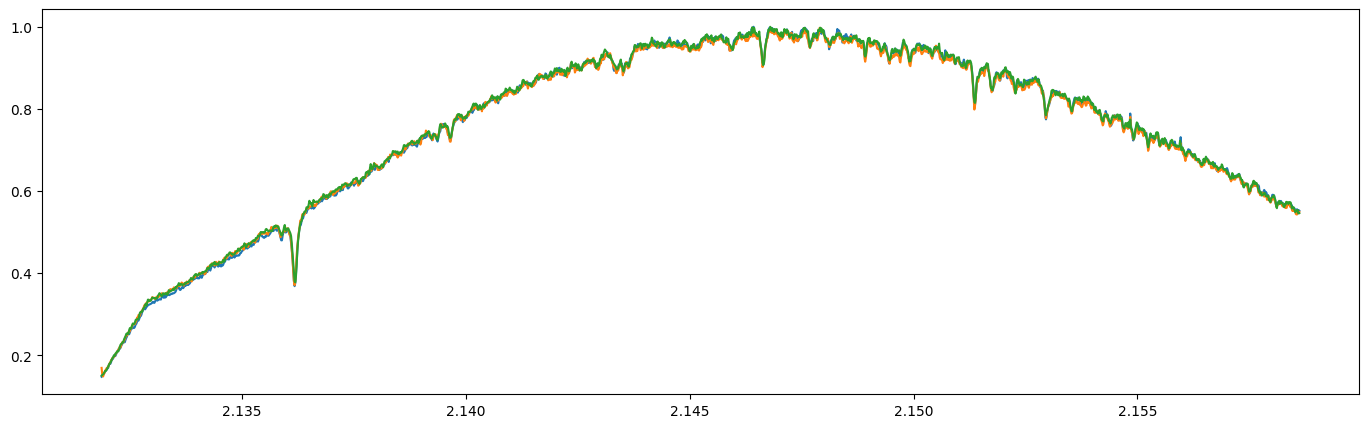

In [35]:
plt.figure(figsize=(17,5)) 
plt.plot(list_of_wl[10], list_of_spectra[10][0])
plt.plot(list_of_wl[10], list_of_spectra[10][1])
plt.plot(list_of_wl[10], list_of_spectra[10][2]) # Variation in time on the same order
plt.savefig(output_dir+'time_difference.pdf')
plt.show()

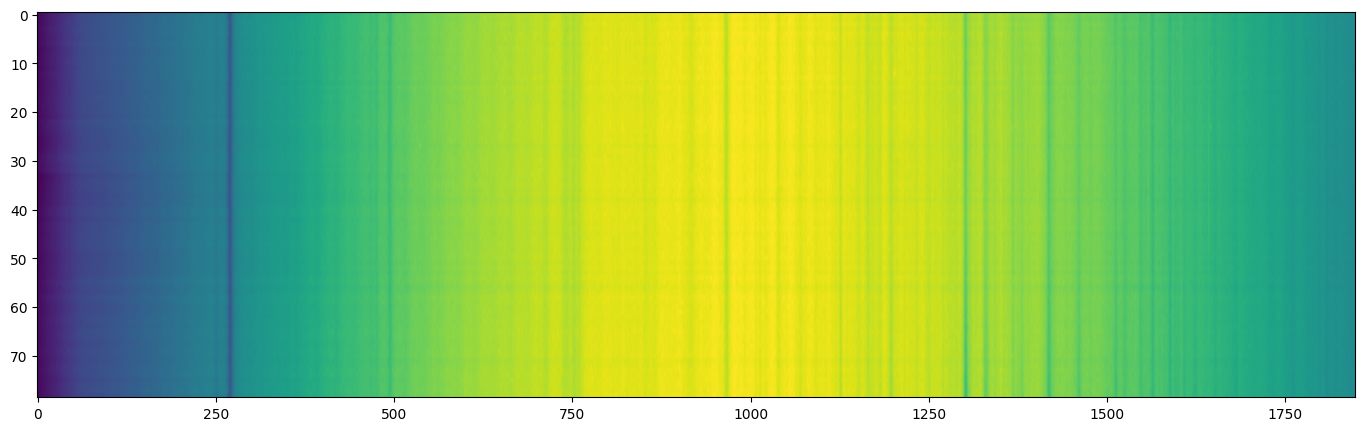

In [36]:
plt.figure(figsize=(17,5))
plt.imshow(list_of_spectra[10], aspect='auto')
# Make sure airtovac is also applied.
plt.savefig(output_dir+'original_waterfall.pdf')
plt.show()

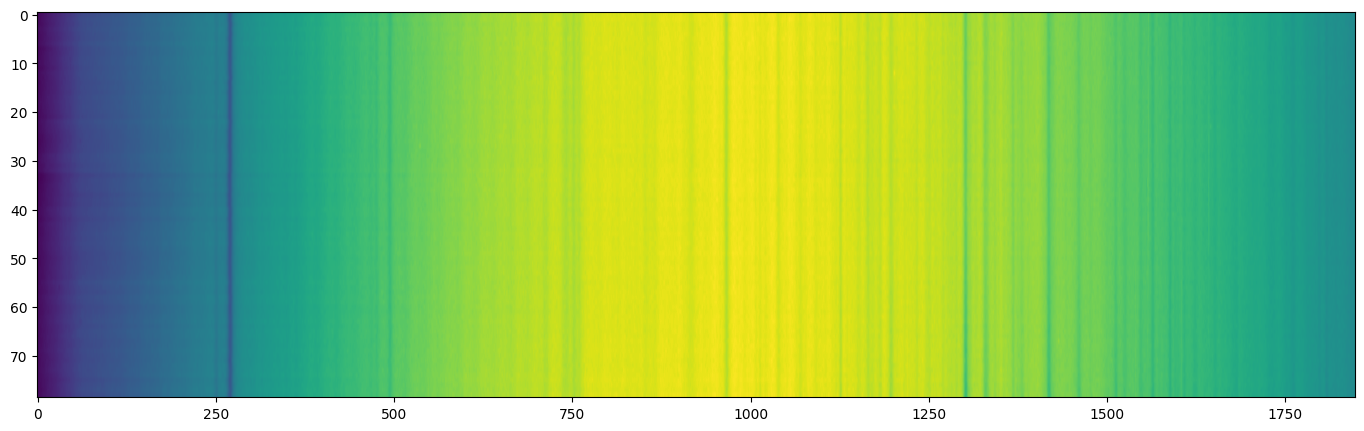

In [37]:
#Normalise each spectral order to its mean flux.
list_of_orders_norm = []

for i in range(len(list_of_spectra)):
    order = list_of_spectra[i]
    order_norm = (order.T / np.median(order, axis=1)).T
    list_of_orders_norm.append(order_norm)

plt.figure(figsize=(17,5))
plt.imshow(list_of_orders_norm[10], aspect='auto')

plt.savefig(output_dir+'normalized_waterfall.pdf')
plt.show()

In [38]:
dir = 'reference_data/observations/WASP-121b/'
output_dir = './POSEIDON_output/WASP-121b/plots/'
file = dir+'data_RAW.pic'
wl_grid, d = pickle.load(open(file, 'rb'))

In [39]:
Nord, Ndet, Npix = d.shape # already removed 69-71
print(Nord, Ntime, Npix)

31 79 2340


In [40]:
list_of_spectra = []
list_of_wl = []

for i in range(Nord):
    list_of_spectra.append(d[i])
    list_of_wl.append(wl_grid[i])

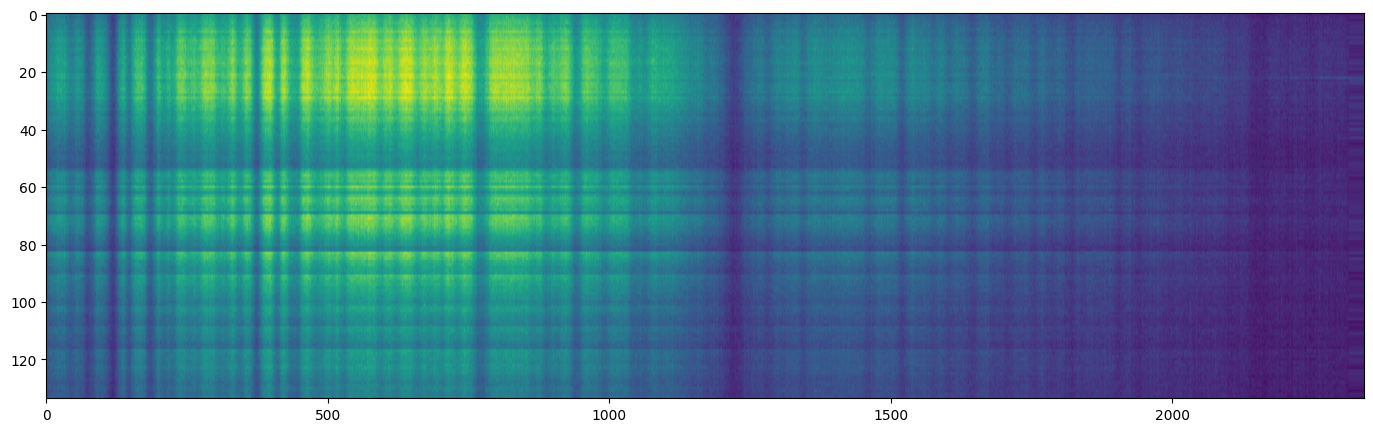

In [41]:
plt.figure(figsize=(17,5))
plt.imshow(list_of_spectra[10], aspect='auto')
# Make sure airtovac is also applied.
plt.savefig(output_dir+'original_waterfall.pdf')
plt.show()

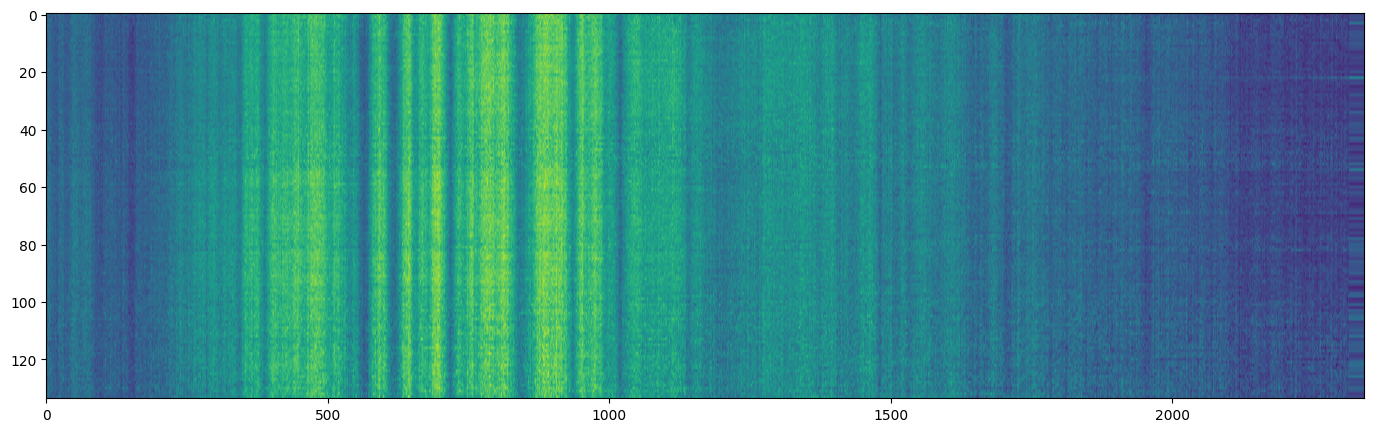

In [42]:
#Normalise each spectral order to its mean flux.
list_of_orders_norm = []

for i in range(len(list_of_spectra)):
    order = list_of_spectra[i]
    order_norm = (order.T / np.median(order, axis=1)).T
    list_of_orders_norm.append(order_norm)

plt.figure(figsize=(17,5))
plt.imshow(list_of_orders_norm[0], aspect='auto')
plt.savefig(output_dir+'normalized_waterfall.pdf')
plt.show()

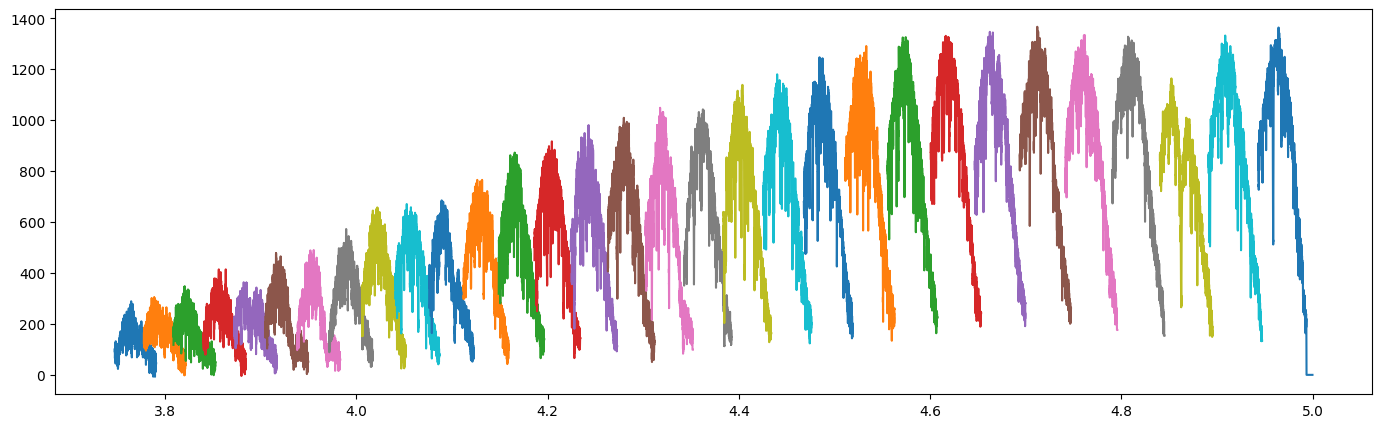

<Figure size 640x480 with 0 Axes>

In [43]:
#Plot orders 40-69 in one plot. Notice blaze and overlap.
plt.figure(figsize=(17,5)) 
for i in range(Nord):
    plt.plot(wl_grid[i], list_of_spectra[i][0])
    # plt.plot(wl_grid[i], list_of_orders_norm[i][0])
plt.show()
plt.savefig(output_dir+'sepctral_oders.pdf')
plt.show()

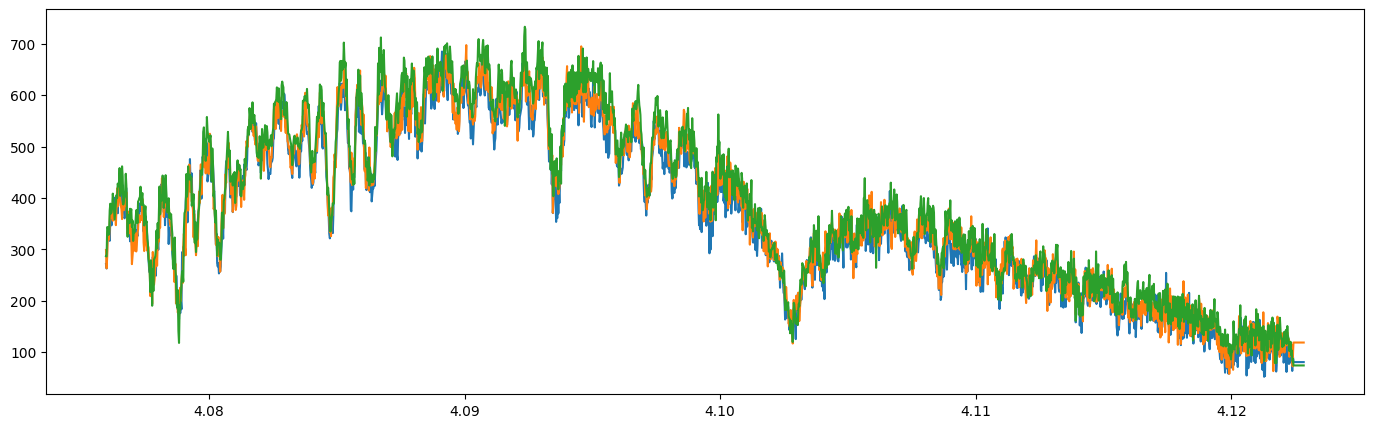

In [44]:
# Plot some e2ds files.
plt.figure(figsize=(17,5)) 
plt.plot(list_of_wl[10], list_of_spectra[10][0])
plt.plot(list_of_wl[10], list_of_spectra[10][1])
plt.plot(list_of_wl[10], list_of_spectra[10][2]) # Variation in time on the same order
plt.savefig(output_dir+'time_difference.pdf')
plt.show()

In [16]:
import dill
pl_dat = dill.load(open('{}/planet_info_py3.dill'.format(dir),'rb'))
p_vel1 = pl_dat['p_vel1']   # planet velocity for transit 1 (transit 2 exists but is low quality)
tmodel1 = pl_dat['tmodel1'] # transit model, used for weighting
bv1 = pl_dat['bv1']         # barycentric correction
ph1 = pl_dat['ph1']         # orbital phase

In [18]:
p_vel1/1000

<Quantity [-102611.75488892, -101253.23875794,  -99894.4703507 ,
            -98531.5886139 ,  -97159.58524695,  -95784.94115226,
            -94402.36585328,  -93014.49612421,  -91622.84958167,
            -90229.5180217 ,  -88827.94647006,  -87424.0708827 ,
            -86017.51071711,  -84602.99504329,  -83189.50073327,
            -81771.04266206,  -80342.29180916,  -78911.6834985 ,
            -77477.22052917,  -76039.21649933,  -74596.81218268,
            -73152.3008176 ,  -71702.24457152,  -70248.59470343,
            -68790.00428906,  -67327.47200867,  -65867.07895418,
            -64400.22672768,  -62929.88332232,  -61455.78331916,
            -59977.06152306,  -58495.65733855,  -56994.35459539,
            -55510.09811132,  -54021.98965911,  -52535.47334781,
            -51043.69293413,  -49548.28158042,  -48049.03797338,
            -46551.49307311,  -45050.78318908,  -43546.70694083,
            -42041.06657936,  -40531.85923083,  -39005.88084423,
            -37494.241616

In [17]:
bv1/1000

array([-6256.65468754, -6254.09892055, -6251.62731485, -6249.13872358,
       -6246.62043291, -6244.10289764, -6241.55544657, -6238.9916218 ,
       -6236.41268433, -6233.82361637, -6231.20808446, -6228.58857435,
       -6225.95263876, -6223.2951118 , -6220.63244884, -6217.95262271,
       -6215.24757548, -6212.5313389 , -6209.80189782, -6207.05307361,
       -6204.30032613, -6201.5313281 , -6198.74591118, -6195.94678739,
       -6193.13162588, -6190.30310857, -6187.4726829 , -6184.62288469,
       -6181.76088929, -6178.88612321, -6175.99578978, -6173.09495835,
       -6170.14867509, -6167.23113248, -6164.30000008, -6161.36669119,
       -6158.41331213, -6155.45600934, -6152.48119121, -6149.50557602,
       -6146.51811277, -6143.51851497, -6140.51190431, -6137.49307189,
       -6134.43561167, -6131.40220754, -6128.32141308, -6125.26941943,
       -6122.20357086, -6119.13349228, -6116.05585524, -6112.9779498 ,
       -6109.86886158, -6106.78808224, -6103.68301994, -6100.56557299,
      

In [20]:
pickle.load(open('/Users/Victini/Desktop/POSEIDON/POSEIDON/reference_data/observations/WASP-77Ab/rvel.pic', 'rb'))

array([23.35046172, 23.35758867, 23.36487244, 23.37171765, 23.37855664,
       23.38547085, 23.39236205, 23.39925333, 23.40621745, 23.41316287,
       23.42009401, 23.4270345 , 23.43406031, 23.44104413, 23.44799727,
       23.45496831, 23.46195389, 23.46898274, 23.47600639, 23.48296632,
       23.48994461, 23.49697533, 23.5039533 , 23.51092201, 23.51788288,
       23.52490141, 23.5318351 , 23.53875775, 23.54574488, 23.56338843,
       23.5702937 , 23.57741888, 23.58439058, 23.5913296 , 23.59819273,
       23.6050764 , 23.61177092, 23.61843307, 23.6251157 , 23.63171707,
       23.63829565, 23.64482226, 23.65136984, 23.65782596, 23.66424877,
       23.67062509, 23.67695634, 23.68329382, 23.68955341, 23.69574412,
       23.70189787, 23.70804335, 23.7140986 , 23.72011263, 23.72605145,
       23.7319952 , 23.73784225, 23.74361658, 23.74934172, 23.75505315,
       23.76066339, 23.76620802, 23.7716892 , 23.77715345, 23.78250882,
       23.78780104, 23.79302144, 23.79821674, 23.80330534, 23.80